# **Libraries & Data**

### Importing Libraries & Packages

In [15]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


### Problem Statement & Dataset description

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [9]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)

df = pd.read_csv("Dataset/heart.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Data Preprocessing

In [10]:
# Make a copy to work on
data = df.copy()

# Drop 'id' and 'dataset' columns (not useful for prediction)
data.drop(["id", "dataset"] , axis = 1, inplace = True)

# Isolate categorical features & Apply Label Encoding to categorical variables
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
encoder = LabelEncoder()
for feature in categorical_features:
  data[feature] = encoder.fit_transform(data[feature])

# Impute missing values for numerical columns with median
numerical_features = ["age", "trestbps", "chol", "thalch", "oldpeak"]
imputer = SimpleImputer(strategy="median")
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Define features and target
X = data.drop("num", axis = 1)
y = data["num"].apply(lambda x: 0 if x == 0 else 1)

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape


((644, 13), (138, 13), (138, 13))

# **Model 1 (Random Forest Classifier)**

Accuracy: 0.7754
Precision: 0.8382
Recall: 0.7403
F1 Score: 0.7862
Log Loss: 0.4401

Classification Report:
               precision    recall  f1-score   support

           0     0.7143    0.8197    0.7634        61
           1     0.8382    0.7403    0.7862        77

    accuracy                         0.7754       138
   macro avg     0.7763    0.7800    0.7748       138
weighted avg     0.7834    0.7754    0.7761       138



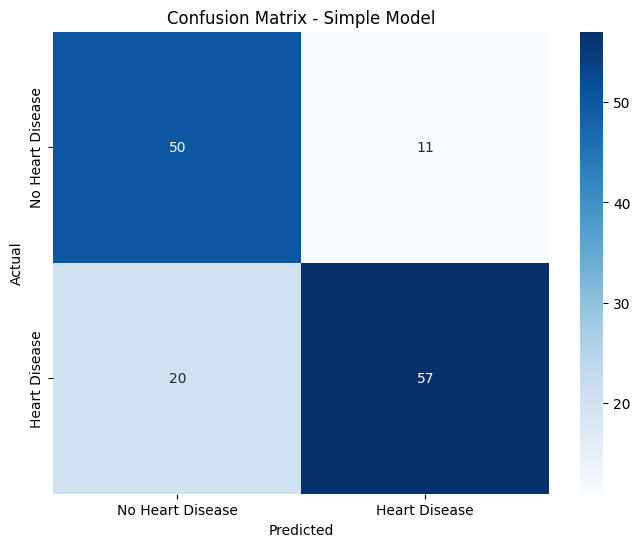

In [11]:
# RF model with fixed best hyperparameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Predict probabilities for log loss
y_proba_rf = rf.predict_proba(X_test)

# Predict classes
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
loss = log_loss(y_test, y_proba_rf)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {loss:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Simple Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Simulating feature size and output classes based on binary classification (1 output)
input_features = 13  # typical number of features in heart disease datasets
output_classes = 1   # binary classification: 0 or 1

# Define the model structure with >2 hidden layers, each with >8 neurons
model = Sequential([
    Dense(128, activation="relu", input_shape=(input_features,)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  # binary output
])

# Plot the model architecture to a file
plot_path = "/content/sample_data/neural_network_architecture!.png"
plot_model(model, to_file=plot_path, show_shapes=True, show_layer_names=True)

plot_path

You must install pydot (`pip install pydot`) for `plot_model` to work.


'/content/sample_data/neural_network_architecture!.png'

# **Model 2 (Neural Network model WITHOUT Optimization)**


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


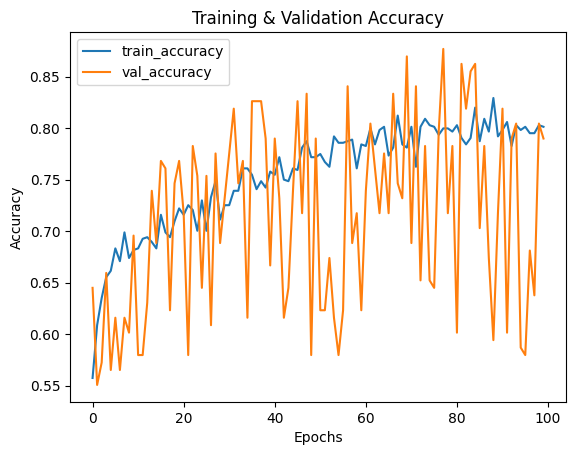

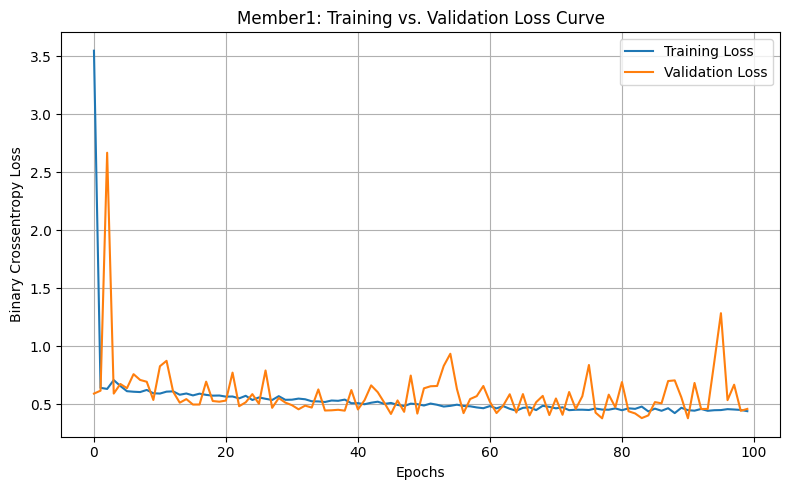

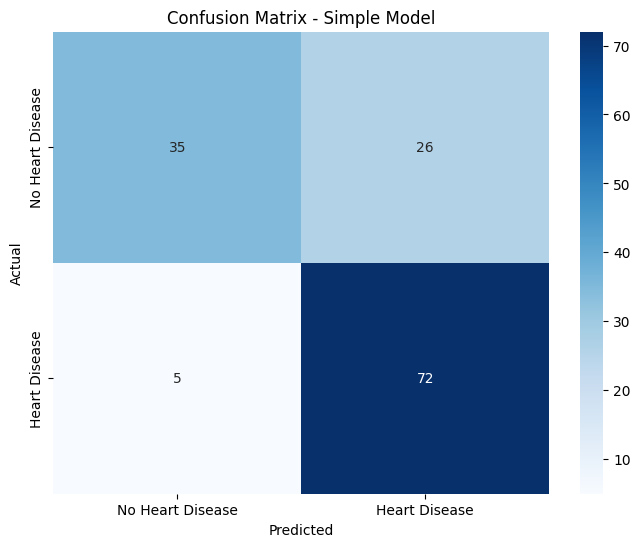

Test Accuracy: 0.7753623188405797
Test Precision: 0.7967132505175984
Test Recall: 0.7753623188405797
Test F1 Score: 0.7654871574113933

Full Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69        61
           1       0.73      0.94      0.82        77

    accuracy                           0.78       138
   macro avg       0.80      0.75      0.76       138
weighted avg       0.80      0.78      0.77       138



In [17]:
# Build neural network
def no_opt_model():
  model1 = Sequential()
  model1.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
  model1.add(Dense(32, activation = 'relu'))
  model1.add(Dense(16, activation = 'relu'))
  model1.add(Dense(8, activation = 'relu'))
  model1.add(Dense(1, activation = 'sigmoid'))

  return model1

# Compile (no manual hyperparameters)
model1 = no_opt_model()
model1.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Train & Plot training history
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 100, verbose = 0)

# Predict on test set
y_test_pred_prob = model1.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

# Plot training accuracy history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

#Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Member1: Training vs. Validation Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()

#Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['No Heart Disease', 'Heart Disease'],
yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Simple Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.show()


# Evaluation metrics
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, average='weighted')
rec = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy:", acc)
print("Test Precision:", prec)
print("Test Recall:", rec)
print("Test F1 Score:", f1)
print("\nFull Classification Report:\n", classification_report(y_test, y_test_pred))

# **Model 3 (Neural Network model WITH Optimization)**


In [18]:
def define_model(optimizer, regularizer=None, lr=None, early_stop=False):
    if lr:
        opt = optimizer(learning_rate=lr)
    else:
        opt = optimizer()

    if regularizer == 'L1':
        reg = l1(0.001)
    elif regularizer == 'L2':
        reg = l2(0.001)
    else:
        reg = None

    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=l1(l1=0.001)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(32, activation="relu", kernel_regularizer=l1(l1=0.001)),
        Dense(64, activation="relu", kernel_regularizer=l1(l1=0.001)),
        Dense(1, activation="sigmoid", kernel_regularizer=l1(l1=0.001))
    ])

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy", "Precision", "Recall"])

    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))
        callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5))

    history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), validation_split=0.2, callbacks=callbacks, verbose=0)
    return model, history

def loss_curve_plot(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Member1: Training vs. Validation Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

def print_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int).flatten()

    cm = confusion_matrix(y_test, y_pred_class)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No Heart Disease', 'Heart Disease'],
    yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title('Confusion Matrix - Simple Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred_class, digits=4))

/Users/angelo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


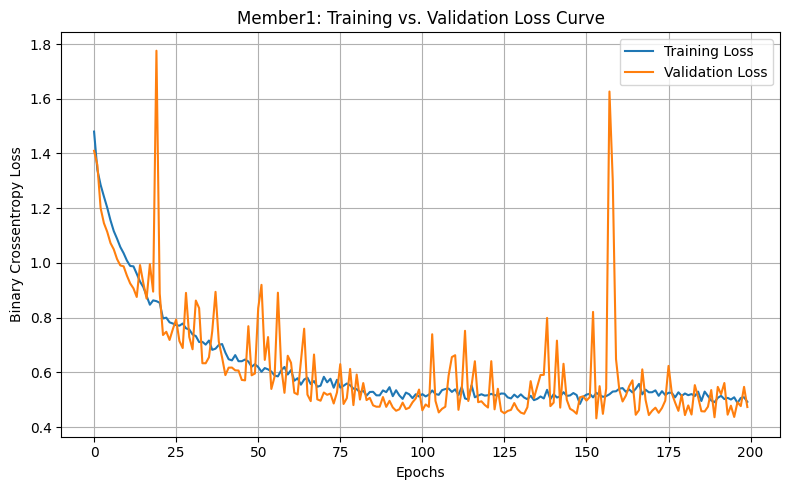

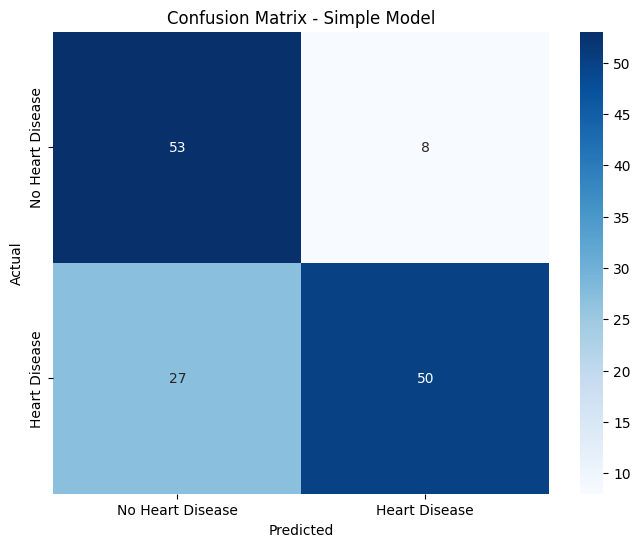

              precision    recall  f1-score   support

           0     0.6625    0.8689    0.7518        61
           1     0.8621    0.6494    0.7407        77

    accuracy                         0.7464       138
   macro avg     0.7623    0.7591    0.7463       138
weighted avg     0.7739    0.7464    0.7456       138



In [ ]:
# -------- MODEL 1 (Basic Optimization (Adam, L2)) ---------
model_1, history_1 = define_model(Adam, 'L2')
loss_curve_plot(history_1)
print_metrics(model_1, X_test, y_test)

/Users/angelo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


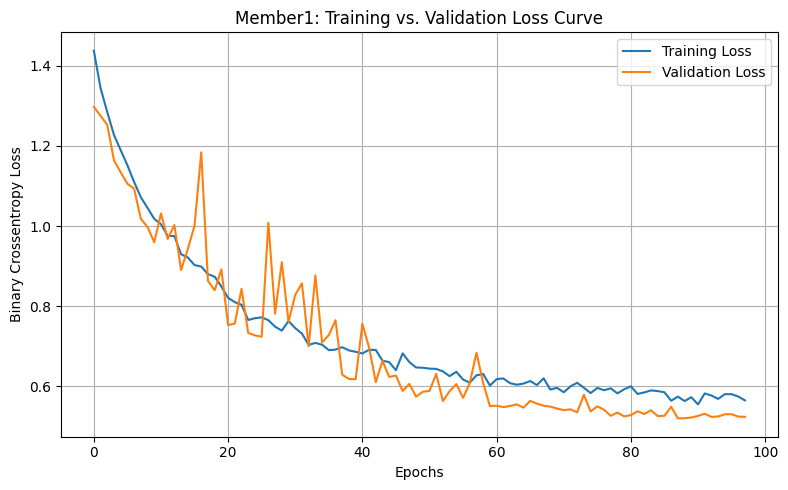

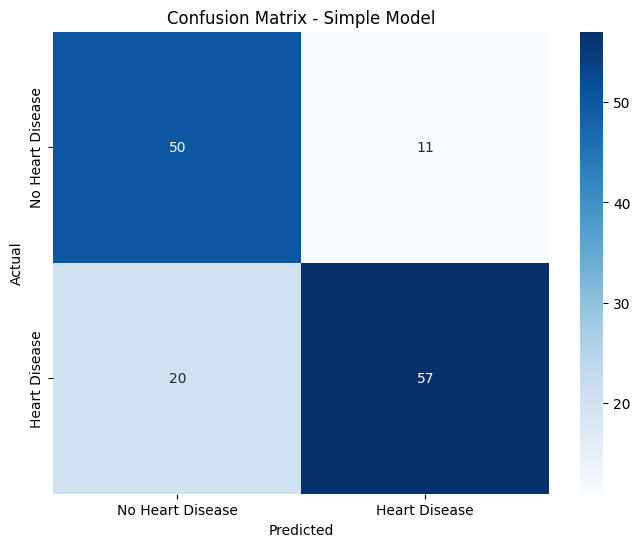

              precision    recall  f1-score   support

           0     0.7143    0.8197    0.7634        61
           1     0.8382    0.7403    0.7862        77

    accuracy                         0.7754       138
   macro avg     0.7763    0.7800    0.7748       138
weighted avg     0.7834    0.7754    0.7761       138



In [25]:
# -------- MODEL 2 (Better regularization + early stopping) ---------
model_2, history_2 = define_model(Adam, 'L1', early_stop=True)
loss_curve_plot(history_2)
print_metrics(model_2, X_test, y_test)

/Users/angelo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


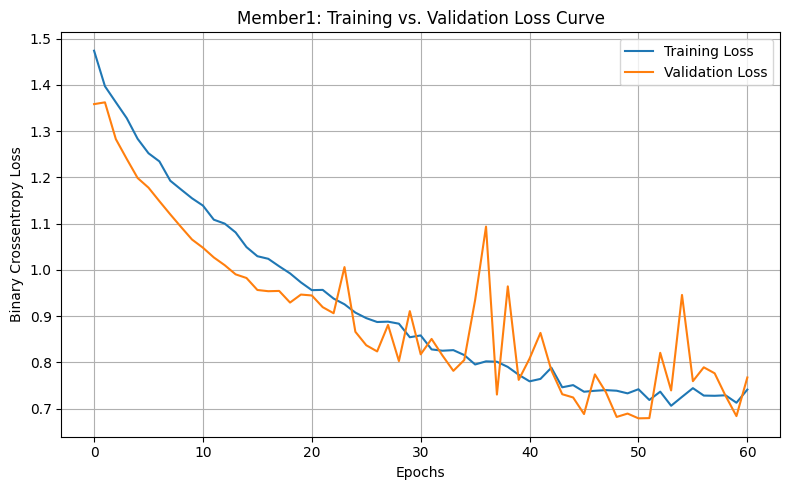

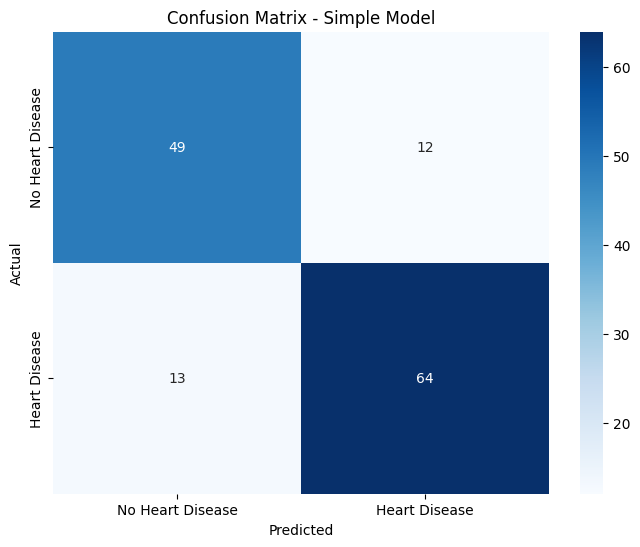

              precision    recall  f1-score   support

           0     0.7903    0.8033    0.7967        61
           1     0.8421    0.8312    0.8366        77

    accuracy                         0.8188       138
   macro avg     0.8162    0.8172    0.8167       138
weighted avg     0.8192    0.8188    0.8190       138



In [21]:
# -------- MODEL 3 (Learning rate tuning + RMSprop + L2 + early stopping) ---------
model_3, history_3 = define_model(RMSprop, 'L2', lr=0.0005, early_stop=True)
loss_curve_plot(history_3)
print_metrics(model_3, X_test, y_test)

/Users/angelo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


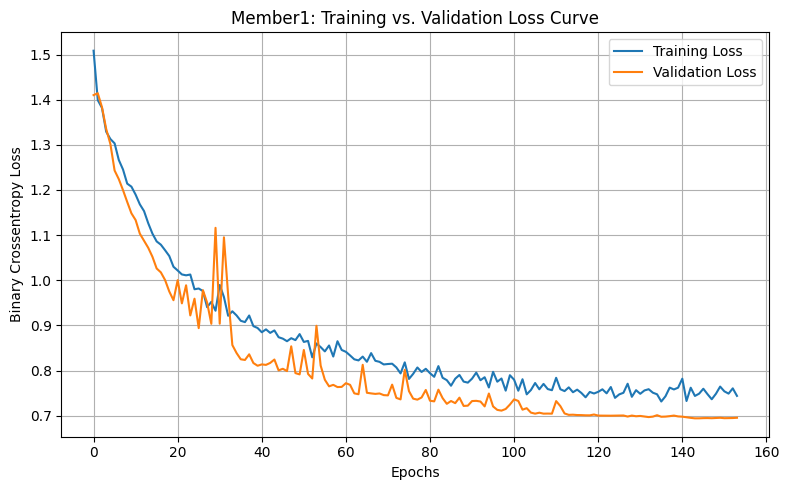

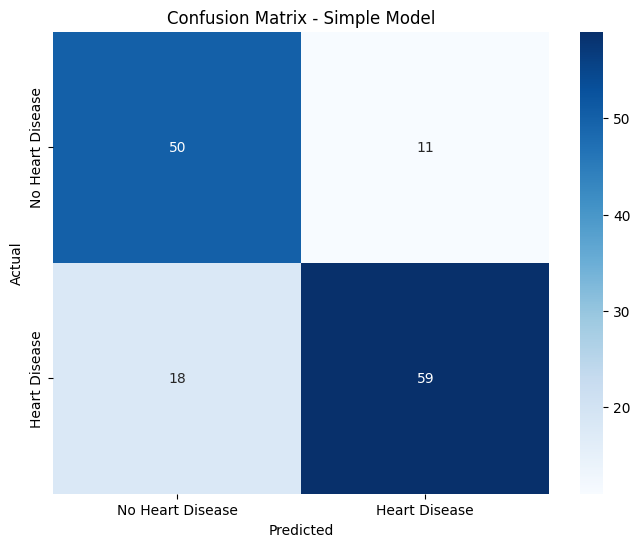

              precision    recall  f1-score   support

           0     0.7353    0.8197    0.7752        61
           1     0.8429    0.7662    0.8027        77

    accuracy                         0.7899       138
   macro avg     0.7891    0.7930    0.7890       138
weighted avg     0.7953    0.7899    0.7906       138



In [23]:
# -------- MODEL 4 () ---------
model_4, history_4 = define_model(Adam, 'L2', lr=0.0004, early_stop=True)
loss_curve_plot(history_4)
print_metrics(model_4, X_test, y_test)

## **Saving the models**

In [28]:
joblib.dump(rf, "Saved Models/rf_model.joblib")
joblib.dump(model1, "Saved Models/MODEL 1 (Learning rate tuning + RMSprop + L2 + early stopping)")
joblib.dump(model_1, "Saved Models/MODEL 2 (Basic Optimization (Adam, L2))")
joblib.dump(model_2, "Saved Models/MODEL 3 (Better regularization (Adam, L1)+ early stopping)")
joblib.dump(model_3, "Saved Models/MODEL 4 (Learning rate tuning + RMSprop + L2 + early stopping)")
joblib.dump(model_4, "Saved Models/MODEL 5 (Adam, 'L2', lr=0.0004, early_stop=True)")


["Saved Models/MODEL 5 (Adam, 'L2', lr=0.0004, early_stop=True)"]

Congratulations!!
